In [3]:
from sentinelhub import SHConfig

config = SHConfig()
print(config)
if config.instance_id == "":
    print("Warning! To use OGC functionality of Sentinel Hub, please configure the `instance_id`.")

{
  "instance_id": "********************************090d",
  "sh_client_id": "********************************3529",
  "sh_client_secret": "****************************iyEB",
  "sh_base_url": "https://services.sentinel-hub.com",
  "sh_auth_base_url": null,
  "sh_token_url": "https://services.sentinel-hub.com/auth/realms/main/protocol/openid-connect/token",
  "geopedia_wms_url": "https://service.geopedia.world",
  "geopedia_rest_url": "https://www.geopedia.world/rest",
  "aws_access_key_id": "",
  "aws_secret_access_key": "",
  "aws_session_token": "",
  "aws_metadata_url": "https://roda.sentinel-hub.com",
  "aws_s3_l1c_bucket": "sentinel-s2-l1c",
  "aws_s3_l2a_bucket": "sentinel-s2-l2a",
  "opensearch_url": "http://opensearch.sentinel-hub.com/resto/api/collections/Sentinel2",
  "max_wfs_records_per_query": 100,
  "max_opensearch_records_per_query": 500,
  "max_download_attempts": 4,
  "download_sleep_time": 5.0,
  "download_timeout_seconds": 120.0,
  "number_of_download_processes": 1,


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from sentinelhub import CRS, BBox, DataCollection, MimeType, WcsRequest, WmsRequest
import datetime
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [6]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

Goal : checkout 2022 fires in Girond 

Date :

12/07/2022
14/08/2022


Localization :
"Landiras"
2nd largest fire in France's recent history since 1949 Landes forest fire

Two interesting things to checkout: 
- moisture index before / after the fire 
- IR land temperature during the fire 

In [54]:

# (-124.45976373769807, 49.5881020343801, -120.53250208020214, 53.51536369187604)
# Initial coordinates
coords_wgs84 = (-124.45976373769807, 49.5881020343801, -120.53250208020214, 53.51536369187604)

# Define the bounding box
bbox = BBox(bbox=coords_wgs84, crs=CRS.WGS84)

# Define the start and end date
start_date = datetime.datetime(2022, 7, 12)
end_date = datetime.datetime(2022, 7, 13)

# Format date string
start_date_str = start_date.strftime("%Y-%m-%d")
end_date_str = end_date.strftime("%Y-%m-%d")

# Define the data collection and layer
data_collection = DataCollection.SENTINEL2_L1C
layer = "FALSE-COLOR"

# Initialize a dictionary to store images in a grid
grid_images = []

# Iterate through the latitude and longitude coordinates with a step size of 0.5 degrees
for lat in range(int(coords_wgs84[1] * 2), int(coords_wgs84[3] * 2), 1):
    grid_row = []
    for lon in range(int(coords_wgs84[0] * 2), int(coords_wgs84[2] * 2), 1):
        # Convert back to float coordinates
        lat_float = lat / 2
        lon_float = lon / 2

        # Create a new bounding box for each coordinate
        bbox = BBox((lon_float, lat_float, lon_float + 0.5, lat_float + 0.5), crs=CRS.WGS84)
        
        # Make WMS request
        wms_request = WmsRequest(
            data_collection=data_collection,
            layer=layer,
            bbox=bbox,
            time= (start_date_str, end_date_str),
            width=856,
            height=512,
            config=config,
        )
        
        # Get data
        wms_image = wms_request.get_data()
        
        # Store the image in the grid dictionary using the coordinate as the key
        grid_row += wms_image
    grid_images += grid_row
grid_images

99 -248 (3584, 5992, 4)
99 -247 (3584, 5992, 4)
99 -246 (3584, 5992, 4)
99 -245 (3584, 5992, 4)
99 -244 (3584, 5992, 4)
99 -243 (3584, 5992, 4)
99 -242 (3584, 5992, 4)
100 -248 (3584, 5992, 4)
100 -247 (3584, 5992, 4)
100 -246 (3584, 5992, 4)
100 -245 (3584, 5992, 4)
100 -244 (3584, 5992, 4)
100 -243 (3584, 5992, 4)
100 -242 (3584, 5992, 4)
101 -248 (3584, 5992, 4)
101 -247 (3584, 5992, 4)
101 -246 (3584, 5992, 4)
101 -245 (3584, 5992, 4)
101 -244 (3584, 5992, 4)
101 -243 (3584, 5992, 4)
101 -242 (3584, 5992, 4)
102 -248 (3584, 5992, 4)
102 -247 (3584, 5992, 4)
102 -246 (3584, 5992, 4)
102 -245 (3584, 5992, 4)
102 -244 (3584, 5992, 4)
102 -243 (3584, 5992, 4)
102 -242 (3584, 5992, 4)
103 -248 (3584, 5992, 4)
103 -247 (3584, 5992, 4)
103 -246 (3584, 5992, 4)
103 -245 (3584, 5992, 4)
103 -244 (3584, 5992, 4)
103 -243 (3584, 5992, 4)
103 -242 (3584, 5992, 4)
104 -248 (3584, 5992, 4)
104 -247 (3584, 5992, 4)
104 -246 (3584, 5992, 4)
104 -245 (3584, 5992, 4)
104 -244 (3584, 5992, 4)
104 -24

In [56]:
final_image

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [45]:


# Initialize an empty array to store the final image
final_image = np.zeros((final_height, final_width, 3), dtype=np.uint8)
final_image.shape

(3584, 5992, 3)

In [9]:
img_array = []

# Loop through dates
current_date = start_date
while current_date <= end_date:
    date_str = current_date.strftime("%Y-%m-%d")
    wms_request = WmsRequest(
        data_collection=data_collection,
        layer=layer,
        bbox=landiras_bbox,
        time=date_str,
        width=856,
        height=512,
        config=config,
    )
    wms_img = wms_request.get_data()
    current_date += datetime.timedelta(days=1)
    if len(wms_image) > 0: 
        img_array.append(wms_image[-1])

In [10]:
print("Returned images: %d." % (len(img_array)))

Returned images: 34.


In [11]:
# simple gif
filename = "landiras.gif"
with imageio.get_writer(filename, mode='I', duration=1000) as writer:
        for image in img_array:
            writer.append_data(image)

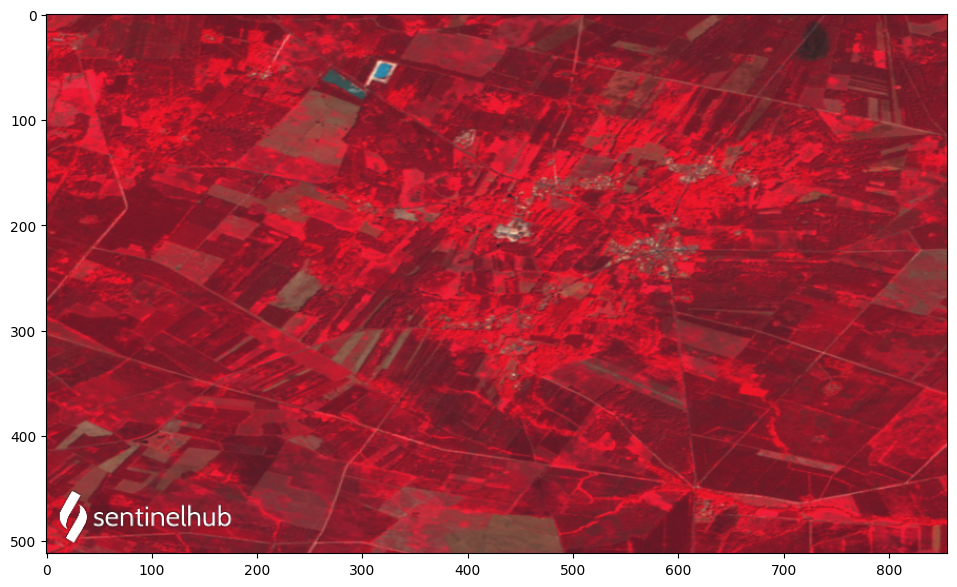

In [12]:
plot_image(img_array[1])

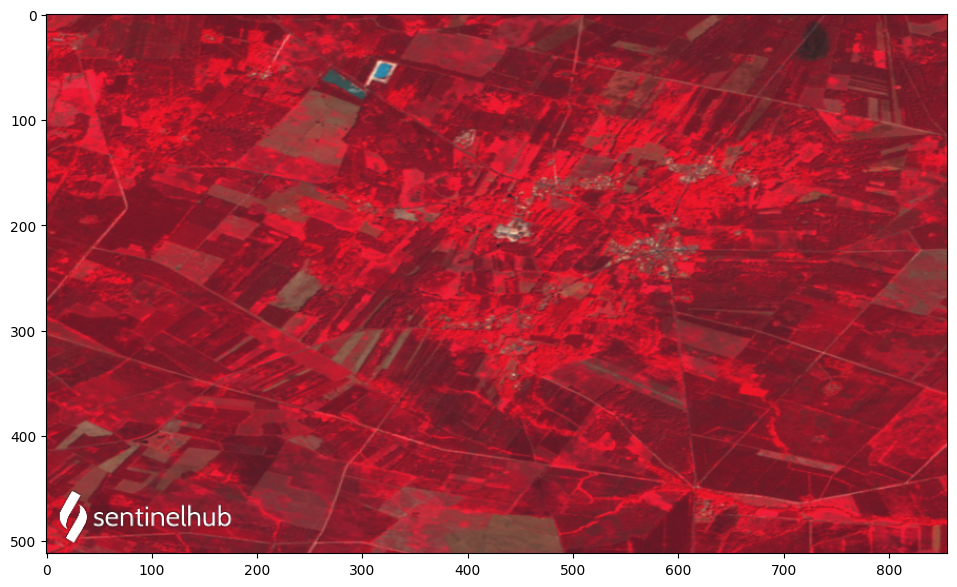

In [13]:
plot_image(img_array[-1])